In [ ]:
import sys, os
from os.path import join, abspath, exists, pardir
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import array as a
from astropy.table import Table

# Train-Validation Split

# Model-building

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Add, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.models import Model
import tensorflow_decision_forests as tfdf

In [ ]:
train_path = "drive/MyDrive/deepl_data_4_23_25/train.csv"
test_path = "drive/MyDrive/deepl_data_4_23_25/test.csv"
valid_path = "drive/MyDrive/deepl_data_4_23_25/validation.csv"

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.utils import to_categorical
training_data = Table.read(train_path)

classes = np.unique(training_data["class"])
class_d = dict(zip(classes,np.arange(len(classes))))
def class_to_num(c): return class_d[c]
f = np.vectorize(class_to_num)

training_data["class_id"] = f(training_data["class"])

x_train = np.stack([a(training_data[col].astype(float)) for col in ([c for c in training_data.colnames if c not in ["ID","class"]])]).T

nb_classes = len(classes)

y_train = to_categorical(a(training_data["class_id"]), nb_classes)

x_train, y_train

(array([[ 9.35161206e-01,  2.61833905e-01,  9.61157622e-01, ...,
          3.50232700e-02,  3.37723737e+00,  0.00000000e+00],
        [-7.52267249e-01, -3.60728512e-01,  8.93852049e-01, ...,
          1.89388173e-02,  1.80705140e+00,  0.00000000e+00],
        [ 3.21781227e-01, -6.83437434e-02,  1.37514912e+00, ...,
          2.25800082e-02,  2.14005280e+00,  0.00000000e+00],
        ...,
        [ 4.02907849e-01,  2.93348403e-02,  6.33440045e+00, ...,
          4.23501207e-02,  2.56877417e+00,  8.00000000e+00],
        [ 3.48951656e-01,  5.16929702e-02,  6.41087320e+00, ...,
          1.61728537e-01,  5.68219267e+00,  8.00000000e+00],
        [ 6.47109284e-03, -2.81227238e-01,  7.73630346e+00, ...,
          8.05316030e-02,  3.01955420e+00,  8.00000000e+00]]),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., 

In [ ]:
valid_data = Table.read(valid_path)
valid_data["class_id"] = f(valid_data["class"])

x_valid = np.stack([a(valid_data[col].astype(float)) for col in ([c for c in valid_data.colnames if c not in ["ID","class"]])]).T
y_valid = to_categorical(a(valid_data["class_id"]), nb_classes)

In [ ]:
test_data = Table.read(test_path)
test_data["class_id"] = f(test_data["class"])

x_test = np.stack([a(test_data[col].astype(float)) for col in ([c for c in test_data.colnames if c not in ["ID","class"]])]).T
y_test = to_categorical(a(test_data["class_id"]), nb_classes)

In [ ]:
for c in range(x_train.shape[1]):
    mean, std = np.mean(x_train[:,c]), np.std(x_train[:,c])
    x_train[:,c] = (x_train[:,c]-mean) / std
    x_valid[:,c] = (x_valid[:,c]-mean) / std
    x_test[:,c] = (x_test[:,c]-mean) / std

In [ ]:
train_df = training_data.to_pandas()
del train_df["ID"]
del train_df["class"]

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="class_id")
#test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df_pd, label=label)

In [ ]:
model = tfdf.keras.RandomForestModel(verbose=2)

Use 2 thread(s) for training
Use /tmp/tmpw1q8_h53 as temporary training directory


In [ ]:
model.fit(train_ds)

Reading training dataset...
Training tensor examples:
Features: {'mode_5': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'mode_10': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'acf_timescale': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'acf_first_min': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'ami2': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'trev': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'high_fluctuation': <tf.Tensor 'data_6:0' shape=(None,) dtype=float64>, 'stretch_high': <tf.Tensor 'data_7:0' shape=(None,) dtype=float64>, 'transition_matrix': <tf.Tensor 'data_8:0' shape=(None,) dtype=float64>, 'periodicity': <tf.Tensor 'data_9:0' shape=(None,) dtype=float64>, 'embedding_dist': <tf.Tensor 'data_10:0' shape=(None,) dtype=float64>, 'ami_timescale': <tf.Tensor 'data_11:0' shape=(None,) dtype=float64>, 'whiten_timescale': <tf.Tensor 'data_12:0' shape=(None,) dtype=float64>, 'outlier_timing_pos': <tf.Tensor 'data_13:0' shape=(None,) d

2025-04-23 15:30:51.022299: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1206] Loading model from path /tmp/tmpw1q8_h53/model/ with prefix 5a1293e28de4467e
I0000 00:00:1745422257.296554     308 decision_forest.cc:761] Model loaded with 300 root(s), 1930012 node(s), and 24 input feature(s).
I0000 00:00:1745422257.296637     308 abstract_model.cc:1404] Engine "RandomForestGeneric" built
2025-04-23 15:30:57.296683: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model trained in 0:02:25.208487
Compiling model...
Model compiled.


In [ ]:
test_df = test_data.to_pandas()
del test_df["ID"]
del test_df["class"]

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="class_id")

In [ ]:
model.compile(metrics=["accuracy"])
model.evaluate(test_ds, return_dict=True)

37/37 [==============================] - 12s 304ms/step - loss: 0.0000e+00 - accuracy: 0.6898


{'loss': 0.0, 'accuracy': 0.6897933483123779}

In [ ]:
pred = model.predict(test_ds)
pred.shape

37/37 [==============================] - 10s 244ms/step


(36927, 9)

In [ ]:
true=test_df["class_id"].values
true

array([8, 2, 8, ..., 5, 5, 8])

In [ ]:
pred_idx = np.argmax(pred,axis=1)
pred_idx

array([8, 5, 8, ..., 5, 5, 8])

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print("Accuracy:",accuracy_score(true,pred_idx))
print("Precision:",precision_score(true,pred_idx,average="macro"))
print("Recall:",recall_score(true,pred_idx,average="macro"))
f1 = f1_score(true,pred_idx,average="macro")
print("F1:",f1)

Accuracy: 0.6897933761204539
Precision: 0.6254629409581084
Recall: 0.7228721473111164
F1: 0.6452607669141184


In [ ]:
id_to_class = dict(zip(np.arange(len(classes)),classes))
def formatter(x, pos):
  return id_to_class[int(x+0.5)-1]

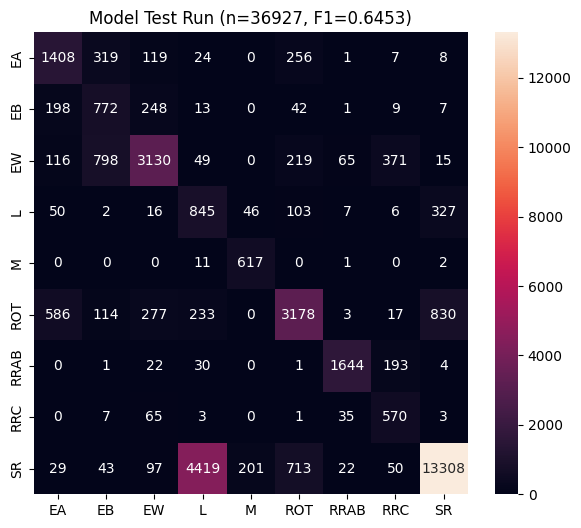

In [ ]:
conf = confusion_matrix(true,pred_idx)
plt.figure(figsize=(7,6))
plt.title(f"Model Test Run (n={len(test_df)}, F1={f1:.4f})")
_=sns.heatmap(conf,annot=True,fmt='d')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.savefig("/content/forest_confusion_matrix.png",dpi=300,bbox_inches="tight")

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

In [ ]:
model.save("deepl_model_design.h5")